In [33]:
!pip install tensorflow-gpu

Defaulting to user installation because normal site-packages is not writeable


In [34]:
import tensorflow as tf

In [35]:
print(tf.__version__)

2.9.2


In [36]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [37]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [38]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [39]:
dataset.shape

(10000, 14)

In [40]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],dummy_na=False)
gender=pd.get_dummies(X['Gender'],dummy_na=False)

In [41]:
geography

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


In [42]:
gender

,Female,Male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
9995,0,1
9996,0,1
9997,1,0
9998,0,1


In [43]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Female,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,1,0,0,0,1
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,1,0,0,0,1
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0,0,1,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,0,1,0,0,1


In [44]:
## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [45]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [46]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [47]:
#make the ANN!
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

In [48]:
# Initialising the ANN
classifier = Sequential()

In [49]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=11,activation='relu'))

In [50]:
# Adding the second hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [51]:
# Adding the output layer 
classifier.add(Dense(units=1,activation='relu'))

In [52]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [53]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [54]:
#Early Stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [55]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.8200 - accuracy: 0.7834 - val_loss: 0.5425 - val_accuracy: 0.7986
Epoch 2/1000
536/536 [==============================] - 1s 1ms/step - loss: 0.4440 - accuracy: 0.8145 - val_loss: 0.4219 - val_accuracy: 0.8156
Epoch 3/1000
536/536 [==============================] - 1s 1ms/step - loss: 0.4049 - accuracy: 0.8313 - val_loss: 0.4426 - val_accuracy: 0.8190
Epoch 4/1000
536/536 [==============================] - 1s 1ms/step - loss: 0.4838 - accuracy: 0.8326 - val_loss: 0.4462 - val_accuracy: 0.8129
Epoch 5/1000
536/536 [==============================] - 1s 1ms/step - loss: 0.4136 - accuracy: 0.8304 - val_loss: 0.4287 - val_accuracy: 0.8273
Epoch 6/1000
536/536 [==============================] - 1s 1ms/step - loss: 0.3978 - accuracy: 0.8343 - val_loss: 0.4005 - val_accuracy: 0.8273
Epoch 7/1000
536/536 [==============================] - 1s 1ms/step - loss: 0.3814 - accuracy: 0.8431 - val_loss: 0.3937 - val_accuracy:

In [56]:
# list all data in history

print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


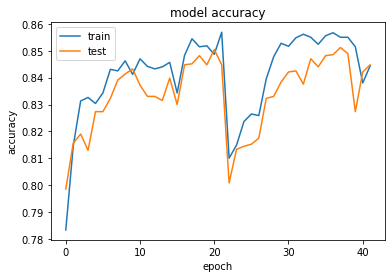

In [57]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

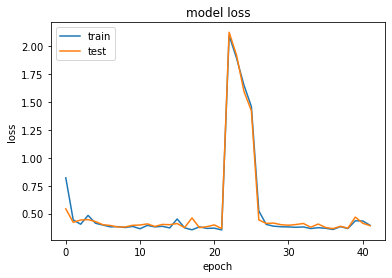

In [58]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [59]:
#Making the predictions and evaluating the model
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 677us/step


In [60]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1524,   71],
       [ 216,  189]], dtype=int64)

In [61]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8565